In [1]:
import pandas as pd

drugs = pd.read_excel("desalted_drugbank_lt_500_mw.xlsx")

FileNotFoundError: [Errno 2] No such file or directory: 'desalted_drugbank_lt_500_mw.xlsx'

In [ ]:
print(len(drugs))

9082


In [ ]:
from rdkit import Chem

sub_CC = Chem.MolFromSmarts("[C]-[C]")
sub_Cc = Chem.MolFromSmarts("[C]-[c]")
sub_cc = Chem.MolFromSmarts("[c]-[c]")
sub_CN = Chem.MolFromSmarts("[C]-[N]")
sub_Cn = Chem.MolFromSmarts("[C]-[n]")
sub_cN = Chem.MolFromSmarts("[c]-[N]")
sub_cn = Chem.MolFromSmarts("[c]-[n]")
sub_CO = Chem.MolFromSmarts("[C]-[O]")
sub_cO = Chem.MolFromSmarts("[c]-[O]")
sub_Co = Chem.MolFromSmarts("[C]-[o]")
sub_co = Chem.MolFromSmarts("[c]-[o]")

titles = ["C—C", "C—c", "c—c", "C—N", "C—n", "c—N", "c—n", "C—O", "c—O"]
substructures = [sub_CC, sub_Cc, sub_cc, sub_CN, sub_Cn, sub_cN, sub_cn, sub_CO, sub_cO, sub_Co, sub_co]
all_hits1 = []

for i1, k1 in enumerate(titles):
    hits = []
    sub = substructures[i1]
    for i,k in drugs.iterrows():
        mol = Chem.MolFromSmiles(k["smiles"])
        if mol.HasSubstructMatch(sub):
            if k["smiles"] not in hits:
                hits.append(k["smiles"])

    all_hits1.append(len(hits))
    print(k1, len(hits))

C—C 7611
C—c 5371
c—c 988
C—N 5548
C—n 1120
c—N 2704
c—n 167
C—O 5932
c—O 2439


In [2]:
bond_classes = [r"C$_{\textit{sp}^3}$–C$_{\textit{sp}^3}$", # 7611
                r"C$_{\textit{sp}^3}$–O$_{\textit{sp}^3}$", # 5932
                r"C$_{\textit{sp}^3}$–N$_{\textit{sp}^3}$", # 5548
                r"C$_{\textit{sp}^3}$–C$_{\textit{sp}^2}$", #5371
                r"C$_{\textit{sp}^2}$–N$_{\textit{sp}^3}$", # 2704
                r"C$_{\textit{sp}^2}$–O$_{\textit{sp}^3}$", # 2439
                r"C$_{\textit{sp}^3}$–N$_{\textit{sp}^2}$", # 1120
                r"C$_{\textit{sp}^2}$–C$_{\textit{sp}^2}$", # 988
                r"C$_{\textit{sp}^2}$–N$_{\textit{sp}^2}$"] # 167


bond_classes = [r"C$_{sp}^3}$–C$_{sp^3}$", # 7611
                r"C$_{sp}^3}$–O$_{sp^3}$", # 5932
                r"C$_{sp}^3}$–N$_{sp^3}$", # 5548
                r"C$_{sp}^3}$–C$_{sp^2}$", #5371
                r"C$_{sp}^2}$–N$_{sp^3}$", # 2704
                r"C$_{sp}^2}$–O$_{sp^3}$", # 2439
                r"C$_{sp}^3}$–N$_{sp^2}$", # 1120
                r"C$_{sp}^2}$–C$_{sp^2}$", # 988
                r"C$_{sp}^2}$–N$_{sp^2}$"] # 167


bond_classes = list(reversed(bond_classes))
hits2 = [7611, 5932, 5548, 5371, 2704, 2439, 1120, 988, 167]
hits2 = list(reversed(hits2))

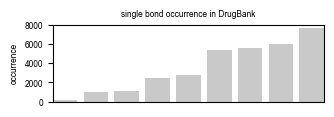

In [6]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(3.5,1))
ax.bar(range(0,len(bond_classes)), hits2, color='#cac9c9')

ax.set_xticks([])
ax.set_xticklabels([])
ax.set_yticks([0, 2000, 4000, 6000, 8000, 10000, 12000, 14000, 16000, 18000, 30000])
ax.set_yticklabels([0, 2000, 4000, 6000, 8000, 10000, 12000, 14000, 16000, 18000, 30000], fontsize=6, fontfamily='arial')
ax.set_ylim([0,8000])

ax.set_ylabel("occurrence", fontsize=6, fontfamily='arial')
ax.set_title("single bond occurrence in DrugBank", fontsize=6, fontfamily='arial')

plt.subplots_adjust(hspace=0, wspace=0)
plt.margins(0,0)


plt.savefig(f"component_a.png", dpi=900, bbox_inches='tight', pad_inches = 0.01)